##Gauss Seidel iteration to solve a linear system $Ax=b$

###Matrix Decomposition
We decompose the matrix $A \in \mathbb{R}^n$
in to the sum of three matrices
$$
A=L+D+U,
$$
where $L$ is strictly lower triangular, $D$ is diagonal and $U$ is strictly upper triangular.

Let $x^\star$ be the solution. Clearly
$$
(L+D+U)x^\star = b
$$
so the solution satisfies
$$
(L+D)x^\star= b-Ux^\star.
$$
Given $x^{\{0\}}$ we construct the iteration
$$
(L+D)x^{\{k+1\}}= b-Ux^{\{k\}}, \quad k=0,1,\dots
$$


###Richardson iteration
Given an approximation $\hat{x}$, let error $e$ be defined as
$$
e=x^\star-\hat{x}
$$
where $x^\star$ is the true solution. Further, let
$$
A\hat{x}=\hat{b}
$$
and note
$$
Ae = A(x^\star-\hat{x})=b-\hat{b}=r
$$
where $r$ is the residual. Rearranging
$$
e= A^{-1}r.
$$
Let $B$ be an approximation to $A^{-1}$, i.e., 
$$
B \approx A^{-1}
$$
and given $x^{\{0\}}$ construct the iteration
$$
x^{\{k+1\}} = x^{\{k\}} + Br^{\{k\}}, \quad k=0, 1, \dots
$$
Jacobi iteration corresponds with the choice
$$
B=(L+D)^{-1}
$$
hence
$$
\begin{align}
x^{\{k+1\}} &= x^{\{k\}} + (L+D)^{-1}r^{\{k\}} \\
&= x^{\{k\}} + (L+D)^{-1}(b - (L+D+U)x^{\{k\}}) \\
&= (L+D)^{-1}(b - Ux^{\{k\}})
\end{align}
$$
or
$$
(L+D) x^{\{k+1\}} = b - U x^{\{k\}}.
$$

### Convergence for a general iterative procedure
Subtracting $x^\star$ from both sides of the iteration and recognizing that $r^\star=4$, we have
$$
\begin{align}
x^{\{k+1\}}-x^\star &= x^{\{k\}}-x^\star + B(r^{\{k\}}-r^\star) \\
&=x^{\{k\}}-x^\star + B((b-Ax^{\{k\}})-(b-Ax^\star)) \\
&=(I-BA)(x^{\{k\}}-x^\star).
\end{align}
$$
Hence
$$
e^{\{k+1\}} = (I-BA) e^{\{k\}}
$$
or
$$
||e^{\{k+1\}}|| \le ||(I-BA)|| \; || e^{\{k\}}||
$$
and the spectral radius
$$
\rho(I-BA) < 1
$$
is a necessary and sufficient condition for convergence.

Further
$$
\lim_{k \to \infty} \frac{||e^{\{k+1\}}||}{||e^{\{k\}}||} = \hbox{constant} \le ||(I-BA)||
$$

Exercise: Need to prove this!!

In [ ]:
def gauss_seidel(n, tol, maxite, verbose):

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="whitegrid", font_scale=1.2)

    # Set random number seed for reproducibility
    np.random.seed(3)

    # Create linear system of equations
    A= (np.random.rand(n, n))       # Construct a square matrix with random entries on (0,1)
    A= A + n * np.identity(n)       # Ensure matrix is diagonally dominant
    b= (np.random.rand(n))          # Construct a vector with random entries
    sol= np.linalg.solve(A,b)
    print('Solution = ',sol)

    # Decompose A
    L= A - np.triu(A)                # Strictly lower triangular part of A
    U= A - np.tril(A)                # Strictly upper triangular part of A
    D= np.diag(np.diag(A))
    LDinv= np.linalg.inv(L+D)
    if verbose >= 6:
        print(L)
        print(U)
        print(D)

    # Prepare for iterations
    ite= 0
    x= np.zeros(n)
    dx= np.ones(n)

    y= np.zeros(n)
    ynew= np.zeros(n)
    dy= np.zeros(n)

    estore= np.zeros(maxite+1)
    rstore= np.zeros(maxite+1)

    while ((np.linalg.norm(dx) > tol) and (ite < maxite)):
        ite+= 1

        # Matrix version
        xnew= LDinv @ (b - U@x)
        
        dx= xnew-x
        x= xnew
        err= sol-x
        estore[ite]= np.linalg.norm(err)

        # Element-wise version
        for i in range(0,n):
            ynew[i]= ( b[i] - A[i,:i]@ynew[:i] - A[i,i+1:]@y[i+1:] )/ A[i,i] 

        dy= ynew-y
        y[:]= ynew[:]  # It is essential not to equate the two vectors!!! Why?
   
        if verbose >= 4:
            print("ite= {0:5d}".format(ite))
            print("x= ", x) 

        if verbose >= 2:
            print("ite= {0:5d}, norm(dx)=  {1:13.6e}".format(ite, np.linalg.norm(dx)))
            print("ite= {0:5d}, norm(err)= {1:13.6e}".format(ite, np.linalg.norm(err)))
            print("ite= {0:5d}, norm(x-y)= {1:13.6e}".format(ite, np.linalg.norm(x-y))) 

        if ite >= 2:
            ratio= np.linalg.norm(estore[ite])/np.linalg.norm(estore[ite-1])
            rstore[ite]= ratio    
            print("ite= {0:5d}, norm(dx)=  {1:13.6e}, error ratio= {2:13.6e}".format(ite, np.linalg.norm(dx), ratio))
        
        if ite == maxite:
           print("Failed to converge")

    # Plot convergence rate ... let's upgrade to seaborn
    ir= np.linspace(2,ite,ite-1)
    plt.plot(ir,rstore[2:ite+1],'ks--')
    plt.title('Gauss-Seidel: Linear convergence rate')
    plt.xlabel('Iteration')
    plt.ylabel('Convergence Rate')

    rate= np.linalg.norm(np.identity(n)-LDinv@A)
    print("Asymptotic linear convergence rate = {0:13.6e}".format(rate))


Solution =  [0.1066695  0.02646925 0.01537951 0.04759532 0.15754887]
ite=     1
x=  [0.14057704 0.03518921 0.0357014  0.05402169 0.15292879]
ite=     1, norm(dx)=   2.204095e-01
ite=     1, norm(err)=  4.124781e-02
ite=     1, norm(x-y)=  9.813078e-18
ite=     2
x=  [0.10464384 0.0263346  0.01563738 0.04816076 0.1576328 ]
ite=     2, norm(dx)=   4.276263e-02
ite=     2, norm(err)=  2.124782e-03
ite=     2, norm(x-y)=  6.938894e-18
ite=     2, norm(dx)=   4.276263e-02, error ratio=  5.151262e-02
ite=     3
x=  [0.10660763 0.02645675 0.01534293 0.04759959 0.15755638]
ite=     3, norm(dx)=   2.068534e-03
ite=     3, norm(err)=  7.347028e-05
ite=     3, norm(x-y)=  7.757919e-18
ite=     3, norm(dx)=   2.068534e-03, error ratio=  3.457779e-02
ite=     4
x=  [0.10667142 0.02646971 0.01537836 0.04759463 0.15754883]
ite=     4, norm(dx)=   7.465447e-05
ite=     4, norm(err)=  2.381346e-06
ite=     4, norm(x-y)=  3.469447e-18
ite=     4, norm(dx)=   7.465447e-05, error ratio=  3.241237e-02
ite=

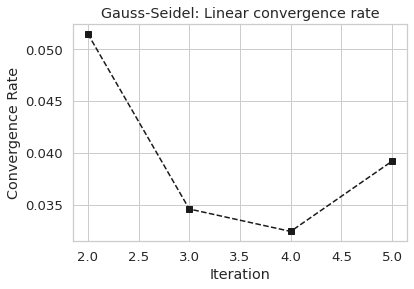

In [ ]:
gauss_seidel(5, 1e-5, 15, 4)
#jacobi(5, 1e-05, 5, 0)
